In [1]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import json

from datetime import datetime, timedelta

## reading

In [2]:
# reading data
btc = pl.read_parquet("Binance_BTCUSDT_2024-06-30_1d_BOOK_SNAPSHOTS.parquet")

# Print the DataFrame
btc

ts,bp,bq,ap,aq
"datetime[μs, Asia/Makassar]","array[f64, 100]","array[f64, 100]","array[f64, 100]","array[f64, 100]"
2024-06-30 08:00:00.056 WITA,"[60986.67, 60986.0, … 60966.93]","[4.2881, 0.0789, … 0.09685]","[60986.68, 60986.74, … 61004.0]","[6.37404, 0.0041, … 0.00013]"
2024-06-30 08:00:00.156 WITA,"[60986.67, 60986.0, … 60966.93]","[4.2881, 0.0789, … 0.09685]","[60986.68, 60986.74, … 61004.0]","[6.05809, 0.0041, … 0.00013]"
2024-06-30 08:00:00.256 WITA,"[60986.67, 60986.0, … 60967.3]","[4.2886, 0.0789, … 0.41001]","[60986.68, 60986.74, … 61003.91]","[5.16148, 0.0041, … 0.00309]"
2024-06-30 08:00:00.356 WITA,"[60986.67, 60986.0, … 60967.3]","[4.2886, 0.0789, … 0.41001]","[60986.68, 60986.74, … 61003.88]","[5.16027, 0.0041, … 0.41007]"
2024-06-30 08:00:00.456 WITA,"[60986.67, 60986.0, … 60966.93]","[4.28305, 0.0789, … 0.09685]","[60986.68, 60986.74, … 61004.0]","[5.16017, 0.0041, … 0.00013]"
…,…,…,…,…
2024-07-01 07:59:59.127 WITA,"[62772.0, 62770.16, … 62754.65]","[0.89523, 0.15186, … 0.00637]","[62772.01, 62772.02, … 62789.22]","[12.5368, 0.0071, … 0.31903]"
2024-07-01 07:59:59.227 WITA,"[62772.0, 62770.16, … 62754.72]","[0.89523, 0.15186, … 0.00009]","[62772.01, 62772.02, … 62789.28]","[12.53531, 0.0071, … 0.00159]"
2024-07-01 07:59:59.627 WITA,"[62772.0, 62770.16, … 62754.72]","[0.89523, 0.15186, … 0.00009]","[62772.01, 62772.02, … 62789.28]","[12.53483, 0.0071, … 0.00159]"


In [3]:
# reading data
eth = pl.read_parquet("Binance_ETHUSDT_2024-06-30_1d_BOOK_SNAPSHOTS.parquet")

# Print the DataFrame
eth

ts,bp,bq,ap,aq
"datetime[μs, Etc/UTC]","array[f64, 100]","array[f64, 100]","array[f64, 100]","array[f64, 100]"
2024-06-30 02:34:52.370 UTC,"[3369.4, 3369.32, … 3367.26]","[4.8023, 5.0488, … 0.0148]","[3369.41, 3369.44, … 3371.22]","[88.2883, 0.5, … 0.089]"
2024-06-30 02:34:52.470 UTC,"[3369.4, 3369.32, … 3367.26]","[4.8023, 5.0488, … 0.0148]","[3369.41, 3369.44, … 3371.2]","[88.2883, 0.5, … 31.0302]"
2024-06-30 02:34:52.770 UTC,"[3369.4, 3369.32, … 3367.26]","[4.8081, 14.1821, … 0.0148]","[3369.41, 3369.44, … 3371.2]","[88.2883, 0.5, … 31.0302]"
2024-06-30 02:34:52.970 UTC,"[3369.4, 3369.38, … 3367.3]","[4.8081, 3.2258, … 5.0488]","[3369.41, 3369.44, … 3371.2]","[88.2883, 0.5, … 31.0302]"
2024-06-30 02:34:53.170 UTC,"[3369.4, 3369.38, … 3367.35]","[14.9489, 3.2258, … 22.2737]","[3369.41, 3369.43, … 3371.14]","[84.5383, 5.9454, … 0.1079]"
…,…,…,…,…
2024-06-30 21:28:56.943 UTC,"[3418.15, 3418.14, … 3416.58]","[50.1821, 0.6178, … 1.4]","[3418.16, 3418.19, … 3419.97]","[21.2405, 5.9442, … 19.6318]"
2024-06-30 21:28:57.043 UTC,"[3418.15, 3418.14, … 3416.58]","[50.1821, 0.6178, … 1.4]","[3418.16, 3418.19, … 3419.98]","[21.2405, 5.9442, … 5.913]"
2024-06-30 21:28:57.243 UTC,"[3418.15, 3418.14, … 3416.58]","[50.1821, 0.6178, … 1.4]","[3418.16, 3418.17, … 3419.97]","[21.2505, 0.1291, … 19.6318]"


## cleaning

In [57]:
# Ensure the 'ts' column is in datetime format (if not already)
btc = btc.with_columns(pl.col("ts").cast(pl.Datetime))

# Define the start and end times as datetime literals
start_time = pl.datetime(2024, 6, 30, 11, 0, 0) # "2024-06-30 11:00:00.000"
end_time = pl.datetime(2024, 6, 30, 15, 0, 0) # "2024-06-30 12:00:00.000"

# Filter the DataFrame based on the 'ts' column
filtered_btc = btc.filter((pl.col("ts") >= start_time) & (pl.col("ts") <= end_time))

# Display the filtered DataFrame
filtered_btc

ts,bp,bq,ap,aq
datetime[μs],"array[f64, 100]","array[f64, 100]","array[f64, 100]","array[f64, 100]"
2024-06-30 11:00:00.032,"[61539.99, 61539.9, … 61522.76]","[15.39526, 0.62655, … 0.22325]","[61540.0, 61540.01, … 61559.38]","[0.44931, 0.00666, … 2.11313]"
2024-06-30 11:00:00.132,"[61539.99, 61539.9, … 61522.77]","[15.39526, 0.62655, … 0.00162]","[61540.0, 61540.01, … 61559.73]","[0.29293, 0.00666, … 0.00013]"
2024-06-30 11:00:00.232,"[61539.99, 61539.9, … 61522.77]","[15.39526, 0.62655, … 0.00162]","[61540.0, 61540.01, … 61559.52]","[0.29293, 0.00666, … 0.00162]"
2024-06-30 11:00:00.332,"[61539.99, 61539.9, … 61523.0]","[15.63969, 0.62655, … 1.74905]","[61540.0, 61540.01, … 61559.18]","[0.29237, 0.00666, … 0.12113]"
2024-06-30 11:00:00.432,"[61539.99, 61539.9, … 61523.06]","[15.23839, 0.62655, … 0.00081]","[61540.0, 61540.01, … 61560.22]","[0.28637, 0.00666, … 0.01537]"
…,…,…,…,…
2024-06-30 14:59:59.083,"[61587.1, 61586.95, … 61569.06]","[5.18799, 0.1449, … 0.4885]","[61587.11, 61587.17, … 61604.21]","[6.6575, 0.003, … 0.00041]"
2024-06-30 14:59:59.183,"[61587.1, 61586.95, … 61569.06]","[5.18799, 0.1449, … 0.4885]","[61587.11, 61587.17, … 61604.21]","[6.75267, 0.003, … 0.00041]"
2024-06-30 14:59:59.483,"[61587.1, 61586.95, … 61568.93]","[5.18799, 0.1449, … 0.004]","[61587.11, 61587.17, … 61603.86]","[6.6575, 0.003, … 0.00162]"


In [58]:
# Extract the first and second elements from bp, bq, ap, aq
# Create a new DataFrame with ts and the extracted values
extracted_btc = filtered_btc.select([
    pl.col("ts"),
    pl.col("bp").arr.first().alias("bp_1"),
    pl.col("bp").arr.get(1).alias("bp_2"),
    pl.col("bq").arr.first().alias("bq_1"),
    pl.col("bq").arr.get(1).alias("bq_2"),
    pl.col("ap").arr.first().alias("ap_1"),
    pl.col("ap").arr.get(1).alias("ap_2"),
    pl.col("aq").arr.first().alias("aq_1"),
    pl.col("aq").arr.get(1).alias("aq_2")
])

# Display the resulting DataFrame
extracted_btc

ts,bp_1,bp_2,bq_1,bq_2,ap_1,ap_2,aq_1,aq_2
datetime[μs],f64,f64,f64,f64,f64,f64,f64,f64
2024-06-30 11:00:00.032,61539.99,61539.9,15.39526,0.62655,61540.0,61540.01,0.44931,0.00666
2024-06-30 11:00:00.132,61539.99,61539.9,15.39526,0.62655,61540.0,61540.01,0.29293,0.00666
2024-06-30 11:00:00.232,61539.99,61539.9,15.39526,0.62655,61540.0,61540.01,0.29293,0.00666
2024-06-30 11:00:00.332,61539.99,61539.9,15.63969,0.62655,61540.0,61540.01,0.29237,0.00666
2024-06-30 11:00:00.432,61539.99,61539.9,15.23839,0.62655,61540.0,61540.01,0.28637,0.00666
…,…,…,…,…,…,…,…,…
2024-06-30 14:59:59.083,61587.1,61586.95,5.18799,0.1449,61587.11,61587.17,6.6575,0.003
2024-06-30 14:59:59.183,61587.1,61586.95,5.18799,0.1449,61587.11,61587.17,6.75267,0.003
2024-06-30 14:59:59.483,61587.1,61586.95,5.18799,0.1449,61587.11,61587.17,6.6575,0.003


In [59]:
# Create a new column 'rounded_ts' that truncates 'ts' to the nearest second
extracted_btc = extracted_btc.with_columns([
    pl.col("ts").dt.truncate("1s").alias("rounded_ts"),  # Round to nearest second
])

# Convert Polars DataFrame to Pandas DataFrame
pandas_df_btc = extracted_btc.to_pandas()

# Group the Pandas DataFrame by 'rounded_ts' and aggregate as needed
btc_agg_second = pandas_df_btc.groupby("rounded_ts").agg({
    "bp_1": "last",
    "bp_2": "last",
    "bq_1": "mean",
    "bq_2": "mean",
    "ap_1": "last",
    "ap_2": "last",
    "aq_1": "mean",
    "aq_2": "mean",
}).reset_index()

# Display the grouped DataFrame
btc_agg_second

,rounded_ts,bp_1,bp_2,bq_1,bq_2,ap_1,ap_2,aq_1,aq_2
0,2024-06-30 11:00:00,61544.99,61544.66,14.592819,0.626550,61545.00,61545.39,0.316812,0.010220
1,2024-06-30 11:00:01,61544.99,61544.66,13.792423,0.626550,61545.00,61545.01,0.387749,0.017705
2,2024-06-30 11:00:02,61545.95,61545.60,9.823066,0.223556,61545.96,61546.00,0.095046,0.049375
3,2024-06-30 11:00:03,61545.95,61545.60,8.761188,0.015650,61545.96,61546.00,1.528093,0.078900
4,2024-06-30 11:00:04,61545.95,61545.60,8.970231,0.015650,61545.96,61546.00,8.210360,0.078900
...,...,...,...,...,...,...,...,...,...
14389,2024-06-30 14:59:55,61587.10,61586.95,5.744164,0.144900,61587.11,61587.17,6.861200,0.003000
14390,2024-06-30 14:59:56,61587.10,61586.95,5.144037,0.144900,61587.11,61587.17,6.861200,0.003000
14391,2024-06-30 14:59:57,61587.10,61586.95,5.153458,0.144900,61587.11,61587.17,6.824827,0.003000
14392,2024-06-30 14:59:58,61587.10,61586.95,5.192590,0.144900,61587.11,61587.17,6.657924,0.003000


In [6]:
# Add 8 hours to the 'ts' column to convert UTC to WITA (Bali time) and remove timezone
eth_wita = eth.with_columns([
    (pl.col("ts") + pl.duration(hours=8)).dt.replace_time_zone(None).alias("ts")
])

# Ensure the 'ts' column is in datetime format (if not already)
eth_wita = eth_wita.with_columns(pl.col("ts").cast(pl.Datetime))

# Define the start and end times as datetime literals for filtering
start_time = pl.datetime(2024, 6, 30, 11, 0, 0)  # "2024-06-30 11:00:00.000"
end_time = pl.datetime(2024, 6, 30, 15, 0, 0)    # "2024-06-30 12:00:00.000"

# Filter the DataFrame based on the 'ts' column
filtered_eth = eth_wita.filter((pl.col("ts") >= start_time) & (pl.col("ts") <= end_time))

# Display the filtered DataFrame
filtered_eth

ts,bp,bq,ap,aq
datetime[μs],"array[f64, 100]","array[f64, 100]","array[f64, 100]","array[f64, 100]"
2024-06-30 11:00:00.027,"[3362.36, 3362.27, … 3360.47]","[67.0213, 0.0297, … 0.2895]","[3362.37, 3362.4, … 3364.25]","[21.1437, 1.421, … 10.1909]"
2024-06-30 11:00:00.127,"[3362.36, 3362.33, … 3360.48]","[75.5403, 0.0297, … 0.0743]","[3362.37, 3362.4, … 3364.25]","[15.9104, 1.421, … 10.1909]"
2024-06-30 11:00:00.227,"[3362.36, 3362.33, … 3360.48]","[75.6847, 0.0297, … 0.0743]","[3362.37, 3362.4, … 3364.25]","[15.9104, 1.421, … 10.1909]"
2024-06-30 11:00:00.327,"[3362.36, 3362.33, … 3360.48]","[75.6847, 0.0297, … 0.0743]","[3362.37, 3362.4, … 3364.25]","[14.4324, 1.421, … 10.1909]"
2024-06-30 11:00:00.427,"[3362.36, 3362.33, … 3360.5]","[75.6847, 0.0297, … 0.002]","[3362.37, 3362.4, … 3364.24]","[12.9259, 1.421, … 0.7717]"
…,…,…,…,…
2024-06-30 14:59:59.579,"[3377.62, 3377.61, … 3376.13]","[99.191, 8.8, … 0.0757]","[3377.63, 3377.65, … 3378.93]","[3.699, 0.5407, … 0.2912]"
2024-06-30 14:59:59.679,"[3377.62, 3377.61, … 3376.12]","[99.1154, 8.8, … 0.0592]","[3377.63, 3377.65, … 3378.93]","[3.699, 0.5407, … 0.2912]"
2024-06-30 14:59:59.779,"[3377.64, 3377.63, … 3376.13]","[82.7232, 24.1844, … 0.0757]","[3377.65, 3377.67, … 3378.95]","[4.7658, 0.0017, … 0.0023]"


In [7]:
# Extract the first and second elements from bp, bq, ap, aq
# Create a new DataFrame with ts and the extracted values
extracted_eth = filtered_eth.select([
    pl.col("ts"),
    pl.col("bp").arr.first().alias("bp_1"),
    pl.col("bp").arr.get(1).alias("bp_2"),
    pl.col("bq").arr.first().alias("bq_1"),
    pl.col("bq").arr.get(1).alias("bq_2"),
    pl.col("ap").arr.first().alias("ap_1"),
    pl.col("ap").arr.get(1).alias("ap_2"),
    pl.col("aq").arr.first().alias("aq_1"),
    pl.col("aq").arr.get(1).alias("aq_2")
])

# Display the resulting DataFrame
extracted_eth

ts,bp_1,bp_2,bq_1,bq_2,ap_1,ap_2,aq_1,aq_2
datetime[μs],f64,f64,f64,f64,f64,f64,f64,f64
2024-06-30 11:00:00.027,3362.36,3362.27,67.0213,0.0297,3362.37,3362.4,21.1437,1.421
2024-06-30 11:00:00.127,3362.36,3362.33,75.5403,0.0297,3362.37,3362.4,15.9104,1.421
2024-06-30 11:00:00.227,3362.36,3362.33,75.6847,0.0297,3362.37,3362.4,15.9104,1.421
2024-06-30 11:00:00.327,3362.36,3362.33,75.6847,0.0297,3362.37,3362.4,14.4324,1.421
2024-06-30 11:00:00.427,3362.36,3362.33,75.6847,0.0297,3362.37,3362.4,12.9259,1.421
…,…,…,…,…,…,…,…,…
2024-06-30 14:59:59.579,3377.62,3377.61,99.191,8.8,3377.63,3377.65,3.699,0.5407
2024-06-30 14:59:59.679,3377.62,3377.61,99.1154,8.8,3377.63,3377.65,3.699,0.5407
2024-06-30 14:59:59.779,3377.64,3377.63,82.7232,24.1844,3377.65,3377.67,4.7658,0.0017


In [56]:
# Extract the first and second elements from bp, bq, ap, aq
# Create a new DataFrame with ts and the extracted values
extracted_eth = filtered_eth.select([
    pl.col("ts"),
    pl.col("bp").arr.first().alias("bp_1"),
    pl.col("bp").arr.get(1).alias("bp_2"),
    pl.col("bq").arr.first().alias("bq_1"),
    pl.col("bq").arr.get(1).alias("bq_2"),
    pl.col("ap").arr.first().alias("ap_1"),
    pl.col("ap").arr.get(1).alias("ap_2"),
    pl.col("aq").arr.first().alias("aq_1"),
    pl.col("aq").arr.get(1).alias("aq_2")
])

# Display the resulting DataFrame
filtered_eth

ts,bp,bq,ap,aq
datetime[μs],"array[f64, 100]","array[f64, 100]","array[f64, 100]","array[f64, 100]"
2024-06-30 11:00:00.027,"[3362.36, 3362.27, … 3360.47]","[67.0213, 0.0297, … 0.2895]","[3362.37, 3362.4, … 3364.25]","[21.1437, 1.421, … 10.1909]"
2024-06-30 11:00:00.127,"[3362.36, 3362.33, … 3360.48]","[75.5403, 0.0297, … 0.0743]","[3362.37, 3362.4, … 3364.25]","[15.9104, 1.421, … 10.1909]"
2024-06-30 11:00:00.227,"[3362.36, 3362.33, … 3360.48]","[75.6847, 0.0297, … 0.0743]","[3362.37, 3362.4, … 3364.25]","[15.9104, 1.421, … 10.1909]"
2024-06-30 11:00:00.327,"[3362.36, 3362.33, … 3360.48]","[75.6847, 0.0297, … 0.0743]","[3362.37, 3362.4, … 3364.25]","[14.4324, 1.421, … 10.1909]"
2024-06-30 11:00:00.427,"[3362.36, 3362.33, … 3360.5]","[75.6847, 0.0297, … 0.002]","[3362.37, 3362.4, … 3364.24]","[12.9259, 1.421, … 0.7717]"
…,…,…,…,…
2024-06-30 14:59:59.579,"[3377.62, 3377.61, … 3376.13]","[99.191, 8.8, … 0.0757]","[3377.63, 3377.65, … 3378.93]","[3.699, 0.5407, … 0.2912]"
2024-06-30 14:59:59.679,"[3377.62, 3377.61, … 3376.12]","[99.1154, 8.8, … 0.0592]","[3377.63, 3377.65, … 3378.93]","[3.699, 0.5407, … 0.2912]"
2024-06-30 14:59:59.779,"[3377.64, 3377.63, … 3376.13]","[82.7232, 24.1844, … 0.0757]","[3377.65, 3377.67, … 3378.95]","[4.7658, 0.0017, … 0.0023]"


In [60]:
# Create a new column 'rounded_ts' that truncates 'ts' to the nearest second
extracted_eth = extracted_eth.with_columns([
    pl.col("ts").dt.truncate("1s").alias("rounded_ts"),  # Round to nearest second
])

# Convert Polars DataFrame to Pandas DataFrame
pandas_df_eth = extracted_eth.to_pandas()

# Group the Pandas DataFrame by 'rounded_ts' and aggregate as needed
eth_agg_second = pandas_df_eth.groupby("rounded_ts").agg({
    "bp_1": "last",
    "bp_2": "last",
    "bq_1": "mean",
    "bq_2": "mean",
    "ap_1": "last",
    "ap_2": "last",
    "aq_1": "mean",
    "aq_2": "mean",
}).reset_index()

# Display the grouped DataFrame
eth_agg_second

,rounded_ts,bp_1,bp_2,bq_1,bq_2,ap_1,ap_2,aq_1,aq_2
0,2024-06-30 11:00:00,3362.36,3362.26,68.376090,0.959270,3362.37,3362.38,19.969150,1.98584
1,2024-06-30 11:00:01,3362.36,3362.30,22.707044,2.132578,3362.37,3362.38,40.852711,2.83310
2,2024-06-30 11:00:02,3362.04,3362.01,7.382200,1.351690,3362.05,3362.06,86.542640,3.83120
3,2024-06-30 11:00:03,3361.80,3361.73,13.456100,0.417700,3361.81,3361.85,125.995020,1.09209
4,2024-06-30 11:00:04,3361.80,3361.73,26.435590,1.038600,3361.81,3361.85,87.387800,0.02970
...,...,...,...,...,...,...,...,...,...
14378,2024-06-30 14:59:55,3377.49,3377.48,118.713010,7.877200,3377.50,3377.51,1.537550,0.23616
14379,2024-06-30 14:59:56,3377.49,3377.48,120.825810,7.877200,3377.50,3377.51,1.289580,0.00240
14380,2024-06-30 14:59:57,3377.49,3377.48,123.893320,8.676240,3377.50,3377.51,1.224700,0.00240
14381,2024-06-30 14:59:58,3377.62,3377.61,119.727937,9.606100,3377.63,3377.66,1.286237,0.11425


## visualization

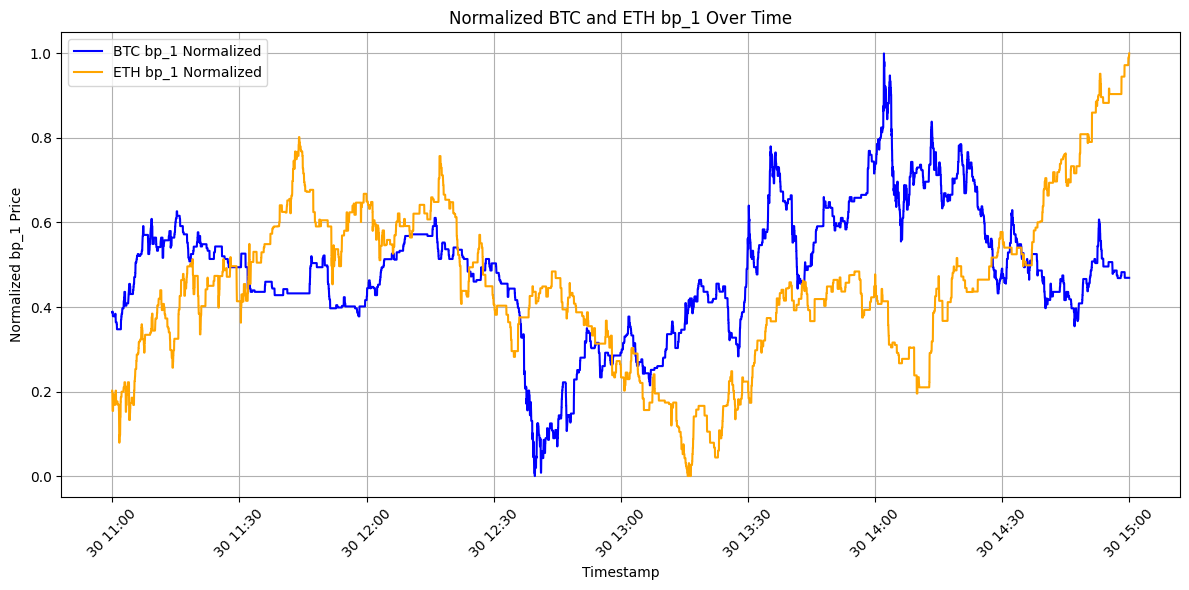

In [62]:
import matplotlib.pyplot as plt

# Normalize the bp_1 prices for BTC
btc_min = btc_agg_second['bp_1'].min()
btc_max = btc_agg_second['bp_1'].max()
btc_agg_second['bp_1_normalized'] = (btc_agg_second['bp_1'] - btc_min) / (btc_max - btc_min)

# Normalize the bp_1 prices for ETH
eth_min = eth_agg_second['bp_1'].min()
eth_max = eth_agg_second['bp_1'].max()
eth_agg_second['bp_1_normalized'] = (eth_agg_second['bp_1'] - eth_min) / (eth_max - eth_min)

# Create a figure and axis for the plot
plt.figure(figsize=(12, 6))

# Plot normalized BTC bp_1
plt.plot(btc_agg_second['rounded_ts'], btc_agg_second['bp_1_normalized'], label='BTC bp_1 Normalized', color='blue')

# Plot normalized ETH bp_1
plt.plot(eth_agg_second['rounded_ts'], eth_agg_second['bp_1_normalized'], label='ETH bp_1 Normalized', color='orange')

# Add labels and title
plt.title('Normalized BTC and ETH bp_1 Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Normalized bp_1 Price')
plt.legend()
plt.grid()

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()

## finding corelation

In [68]:
# Merge the two DataFrames on the rounded_ts column
merged_df = pd.merge(btc_agg_second, eth_agg_second, on='rounded_ts', suffixes=('_btc', '_eth'))

# Calculate the change in bp_1_btc from the previous row
merged_df['bp_1_btc_change_prev'] = merged_df['bp_1_btc'] - merged_df['bp_1_btc'].shift(1)

# Calculate the change in bp_1_eth to the next row
merged_df['bp_1_eth_change_next'] = merged_df['bp_1_eth'].shift(-1) - merged_df['bp_1_eth']

# Create the btc_up column based on the conditions
merged_df['btc_price_change'] = np.where(merged_df['bp_1_btc_change_prev'] > 0, 1, 
                                np.where(merged_df['bp_1_btc_change_prev'] < 0, -1, 0))

# Create the eth_up column based on the conditions
merged_df['eth_price_change'] = np.where(merged_df['bp_1_eth_change_next'] > 0, 1, 
                                np.where(merged_df['bp_1_eth_change_next'] < 0, -1, 0))

merged_df

,rounded_ts,bp_1_btc,bp_2_btc,bq_1_btc,bq_2_btc,ap_1_btc,ap_2_btc,aq_1_btc,aq_2_btc,bp_1_normalized_btc,...,bq_2_eth,ap_1_eth,ap_2_eth,aq_1_eth,aq_2_eth,bp_1_normalized_eth,bp_1_btc_change_prev,bp_1_eth_change_next,btc_price_change,eth_price_change
0,2024-06-30 11:00:00,61544.99,61544.66,14.592819,0.626550,61545.00,61545.39,0.316812,0.010220,0.387148,...,0.959270,3362.37,3362.38,19.969150,1.98584,0.202089,NaN,0.00,0,0
1,2024-06-30 11:00:01,61544.99,61544.66,13.792423,0.626550,61545.00,61545.01,0.387749,0.017705,0.387148,...,2.132578,3362.37,3362.38,40.852711,2.83310,0.202089,0.00,-0.32,0,-1
2,2024-06-30 11:00:02,61545.95,61545.60,9.823066,0.223556,61545.96,61546.00,0.095046,0.049375,0.389015,...,1.351690,3362.05,3362.06,86.542640,3.83120,0.185379,0.96,-0.24,1,-1
3,2024-06-30 11:00:03,61545.95,61545.60,8.761188,0.015650,61545.96,61546.00,1.528093,0.078900,0.389015,...,0.417700,3361.81,3361.85,125.995020,1.09209,0.172846,0.00,0.00,0,0
4,2024-06-30 11:00:04,61545.95,61545.60,8.970231,0.015650,61545.96,61546.00,8.210360,0.078900,0.389015,...,1.038600,3361.81,3361.85,87.387800,0.02970,0.172846,0.00,-0.36,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14372,2024-06-30 14:59:55,61587.10,61586.95,5.744164,0.144900,61587.11,61587.17,6.861200,0.003000,0.469075,...,7.877200,3377.50,3377.51,1.537550,0.23616,0.992167,0.00,0.00,0,0
14373,2024-06-30 14:59:56,61587.10,61586.95,5.144037,0.144900,61587.11,61587.17,6.861200,0.003000,0.469075,...,7.877200,3377.50,3377.51,1.289580,0.00240,0.992167,0.00,0.00,0,0
14374,2024-06-30 14:59:57,61587.10,61586.95,5.153458,0.144900,61587.11,61587.17,6.824827,0.003000,0.469075,...,8.676240,3377.50,3377.51,1.224700,0.00240,0.992167,0.00,0.13,0,1
14375,2024-06-30 14:59:58,61587.10,61586.95,5.192590,0.144900,61587.11,61587.17,6.657924,0.003000,0.469075,...,9.606100,3377.63,3377.66,1.286237,0.11425,0.998956,0.00,0.02,0,1


In [69]:
# Calculate the change in bp_1_btc from the previous row
merged_df['bp_1_btc_change_prev'] = merged_df['bp_1_btc'] - merged_df['bp_1_btc'].shift(1)

# Calculate the change in bp_1_eth to the next row
merged_df['bp_1_eth_change_next'] = merged_df['bp_1_eth'].shift(-1) - merged_df['bp_1_eth']

# Create the btc_up column based on the conditions
merged_df['btc_price_change'] = np.where(merged_df['bp_1_btc_change_prev'] > 0, 1, 
                                np.where(merged_df['bp_1_btc_change_prev'] < 0, -1, 0))

# Create the eth_up column based on the conditions
merged_df['eth_price_change'] = np.where(merged_df['bp_1_eth_change_next'] > 0, 1, 
                                np.where(merged_df['bp_1_eth_change_next'] < 0, -1, 0))

merged_df

,rounded_ts,bp_1_btc,bp_2_btc,bq_1_btc,bq_2_btc,ap_1_btc,ap_2_btc,aq_1_btc,aq_2_btc,bp_1_normalized_btc,...,bq_2_eth,ap_1_eth,ap_2_eth,aq_1_eth,aq_2_eth,bp_1_normalized_eth,bp_1_btc_change_prev,bp_1_eth_change_next,btc_price_change,eth_price_change
0,2024-06-30 11:00:00,61544.99,61544.66,14.592819,0.626550,61545.00,61545.39,0.316812,0.010220,0.387148,...,0.959270,3362.37,3362.38,19.969150,1.98584,0.202089,NaN,0.00,0,0
1,2024-06-30 11:00:01,61544.99,61544.66,13.792423,0.626550,61545.00,61545.01,0.387749,0.017705,0.387148,...,2.132578,3362.37,3362.38,40.852711,2.83310,0.202089,0.00,-0.32,0,-1
2,2024-06-30 11:00:02,61545.95,61545.60,9.823066,0.223556,61545.96,61546.00,0.095046,0.049375,0.389015,...,1.351690,3362.05,3362.06,86.542640,3.83120,0.185379,0.96,-0.24,1,-1
3,2024-06-30 11:00:03,61545.95,61545.60,8.761188,0.015650,61545.96,61546.00,1.528093,0.078900,0.389015,...,0.417700,3361.81,3361.85,125.995020,1.09209,0.172846,0.00,0.00,0,0
4,2024-06-30 11:00:04,61545.95,61545.60,8.970231,0.015650,61545.96,61546.00,8.210360,0.078900,0.389015,...,1.038600,3361.81,3361.85,87.387800,0.02970,0.172846,0.00,-0.36,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14372,2024-06-30 14:59:55,61587.10,61586.95,5.744164,0.144900,61587.11,61587.17,6.861200,0.003000,0.469075,...,7.877200,3377.50,3377.51,1.537550,0.23616,0.992167,0.00,0.00,0,0
14373,2024-06-30 14:59:56,61587.10,61586.95,5.144037,0.144900,61587.11,61587.17,6.861200,0.003000,0.469075,...,7.877200,3377.50,3377.51,1.289580,0.00240,0.992167,0.00,0.00,0,0
14374,2024-06-30 14:59:57,61587.10,61586.95,5.153458,0.144900,61587.11,61587.17,6.824827,0.003000,0.469075,...,8.676240,3377.50,3377.51,1.224700,0.00240,0.992167,0.00,0.13,0,1
14375,2024-06-30 14:59:58,61587.10,61586.95,5.192590,0.144900,61587.11,61587.17,6.657924,0.003000,0.469075,...,9.606100,3377.63,3377.66,1.286237,0.11425,0.998956,0.00,0.02,0,1


In [79]:
merged_df.columns

Index(['rounded_ts', 'bp_1_btc', 'bp_2_btc', 'bq_1_btc', 'bq_2_btc',
       'ap_1_btc', 'ap_2_btc', 'aq_1_btc', 'aq_2_btc', 'bp_1_normalized_btc',
       'bp_1_eth', 'bp_2_eth', 'bq_1_eth', 'bq_2_eth', 'ap_1_eth', 'ap_2_eth',
       'aq_1_eth', 'aq_2_eth', 'bp_1_normalized_eth', 'bp_1_btc_change_prev',
       'bp_1_eth_change_next', 'btc_price_change', 'eth_price_change'],
      dtype='object')

In [71]:
cor_df = merged_df[['rounded_ts','btc_price_change','eth_price_change']]
cor_df

,rounded_ts,btc_price_change,eth_price_change
0,2024-06-30 11:00:00,0,0
1,2024-06-30 11:00:01,0,-1
2,2024-06-30 11:00:02,1,-1
3,2024-06-30 11:00:03,0,0
4,2024-06-30 11:00:04,0,-1
...,...,...,...
14372,2024-06-30 14:59:55,0,0
14373,2024-06-30 14:59:56,0,0
14374,2024-06-30 14:59:57,0,1
14375,2024-06-30 14:59:58,0,1


In [81]:
# Convert 'rounded_ts' to datetime if it's not already
merged_df['rounded_ts'] = pd.to_datetime(merged_df['rounded_ts'])

# --- Counting occurrences of 1, 0, and -1 in both columns ---
btc_count_1 = (merged_df['btc_price_change'] == 1).sum()
btc_count_0 = (merged_df['btc_price_change'] == 0).sum()
btc_count_neg1 = (merged_df['btc_price_change'] == -1).sum()

eth_count_1 = (merged_df['eth_price_change'] == 1).sum()
eth_count_0 = (merged_df['eth_price_change'] == 0).sum()
eth_count_neg1 = (merged_df['eth_price_change'] == -1).sum()

# Print counts of occurrences
print(f"Count of '1' in btc_price_change: {btc_count_1}")
print(f"Count of '0' in btc_price_change: {btc_count_0}")
print(f"Count of '-1' in btc_price_change: {btc_count_neg1}")

print(f"Count of '1' in eth_price_change: {eth_count_1}")
print(f"Count of '0' in eth_price_change: {eth_count_0}")
print(f"Count of '-1' in eth_price_change: {eth_count_neg1}")

Count of '1' in btc_price_change: 812
Count of '0' in btc_price_change: 12826
Count of '-1' in btc_price_change: 739
Count of '1' in eth_price_change: 542
Count of '0' in eth_price_change: 13411
Count of '-1' in eth_price_change: 424


In [82]:
# List to store time differences
time_deltas = []

# Iterate over rows in cor_df
for i in range(len(merged_df)):
    # Check if the current btc_price_change is 1
    if merged_df.loc[i, 'btc_price_change'] == 1:
        # Find the next occurrence of eth_price_change == 1
        for j in range(i + 1, len(merged_df)):
            if merged_df.loc[j, 'eth_price_change'] == 1:
                # Calculate the time difference in seconds
                time_diff = (merged_df.loc[j, 'rounded_ts'] - merged_df.loc[i, 'rounded_ts']).total_seconds()
                time_deltas.append(time_diff)
                break  # Stop searching after finding the first occurrence

# Convert to a DataFrame for easier analysis
time_delta_df = pd.DataFrame(time_deltas, columns=['time_delta'])

# Display the time differences DataFrame
print(time_delta_df)

     time_delta
0           9.0
1           6.0
2           7.0
3           3.0
4           2.0
..          ...
807         4.0
808       120.0
809       101.0
810         9.0
811        43.0

[812 rows x 1 columns]


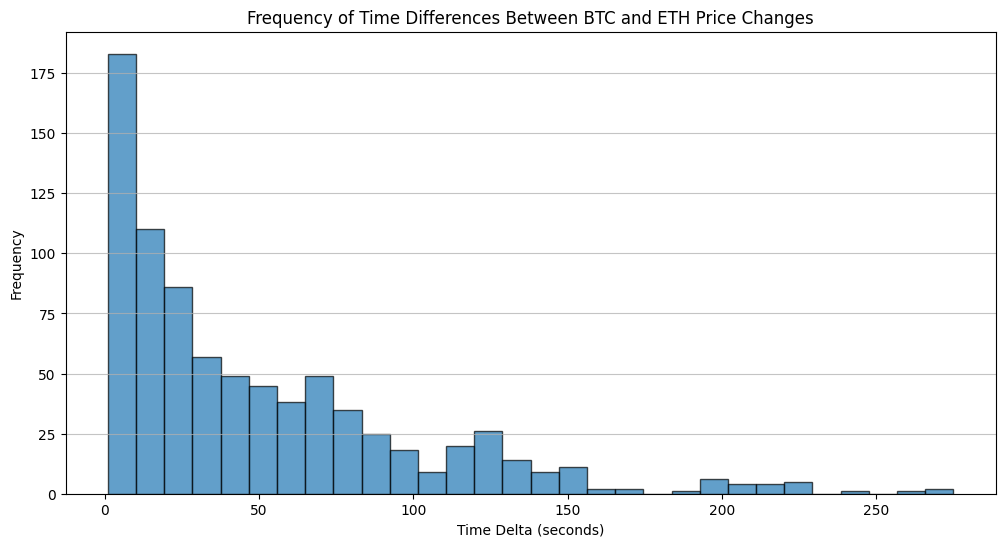

In [77]:
import matplotlib.pyplot as plt

# Plotting the frequency of time deltas
plt.figure(figsize=(12, 6))

# Create a histogram
plt.hist(time_delta_df['time_delta'], bins=30, edgecolor='black', alpha=0.7)

# Add labels and title
plt.title('Frequency of Time Differences Between BTC and ETH Price Changes')
plt.xlabel('Time Delta (seconds)')
plt.ylabel('Frequency')

# Show grid
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

Correlation between BTC and ETH price changes: -0.03074378660024727


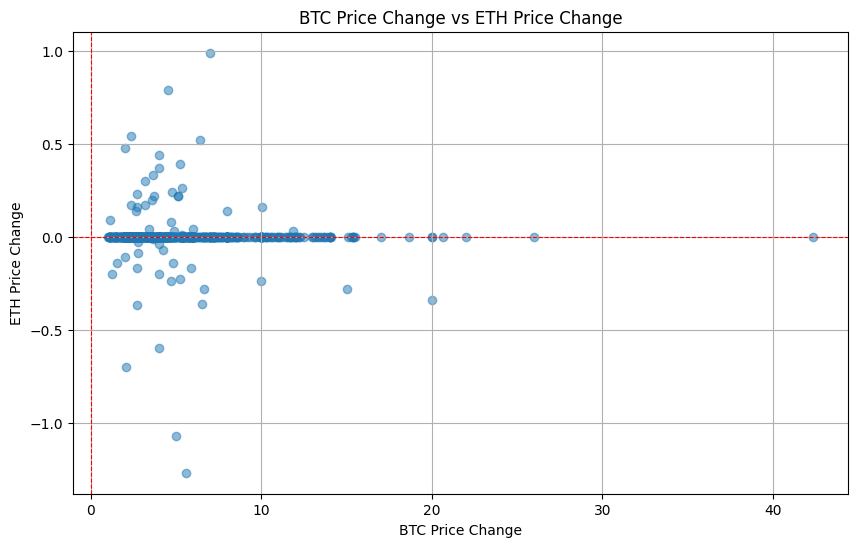

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume merged_df is already defined

# Define the threshold for BTC price increase
btc_increase_threshold = 1.0  # Change this value based on your criteria

# Filter for rows where BTC price increased by the specified amount
filtered_df = merged_df[merged_df['bp_1_btc_change_prev'] > btc_increase_threshold]

# Now, you can analyze how ETH price changed in those instances
eth_changes = filtered_df['bp_1_eth_change_next']

# Calculate correlation
correlation = filtered_df['bp_1_btc_change_prev'].corr(filtered_df['bp_1_eth_change_next'])
print(f'Correlation between BTC and ETH price changes: {correlation}')

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['bp_1_btc_change_prev'], filtered_df['bp_1_eth_change_next'], alpha=0.5)
plt.title('BTC Price Change vs ETH Price Change')
plt.xlabel('BTC Price Change')
plt.ylabel('ETH Price Change')
plt.grid()
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)  # Reference line for no change
plt.axvline(0, color='red', linestyle='--', linewidth=0.8)  # Reference line for no change
plt.show()


In [84]:
merged_df

,rounded_ts,bp_1_btc,bp_2_btc,bq_1_btc,bq_2_btc,ap_1_btc,ap_2_btc,aq_1_btc,aq_2_btc,bp_1_normalized_btc,...,bq_2_eth,ap_1_eth,ap_2_eth,aq_1_eth,aq_2_eth,bp_1_normalized_eth,bp_1_btc_change_prev,bp_1_eth_change_next,btc_price_change,eth_price_change
0,2024-06-30 11:00:00,61544.99,61544.66,14.592819,0.626550,61545.00,61545.39,0.316812,0.010220,0.387148,...,0.959270,3362.37,3362.38,19.969150,1.98584,0.202089,NaN,0.00,0,0
1,2024-06-30 11:00:01,61544.99,61544.66,13.792423,0.626550,61545.00,61545.01,0.387749,0.017705,0.387148,...,2.132578,3362.37,3362.38,40.852711,2.83310,0.202089,0.00,-0.32,0,-1
2,2024-06-30 11:00:02,61545.95,61545.60,9.823066,0.223556,61545.96,61546.00,0.095046,0.049375,0.389015,...,1.351690,3362.05,3362.06,86.542640,3.83120,0.185379,0.96,-0.24,1,-1
3,2024-06-30 11:00:03,61545.95,61545.60,8.761188,0.015650,61545.96,61546.00,1.528093,0.078900,0.389015,...,0.417700,3361.81,3361.85,125.995020,1.09209,0.172846,0.00,0.00,0,0
4,2024-06-30 11:00:04,61545.95,61545.60,8.970231,0.015650,61545.96,61546.00,8.210360,0.078900,0.389015,...,1.038600,3361.81,3361.85,87.387800,0.02970,0.172846,0.00,-0.36,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14372,2024-06-30 14:59:55,61587.10,61586.95,5.744164,0.144900,61587.11,61587.17,6.861200,0.003000,0.469075,...,7.877200,3377.50,3377.51,1.537550,0.23616,0.992167,0.00,0.00,0,0
14373,2024-06-30 14:59:56,61587.10,61586.95,5.144037,0.144900,61587.11,61587.17,6.861200,0.003000,0.469075,...,7.877200,3377.50,3377.51,1.289580,0.00240,0.992167,0.00,0.00,0,0
14374,2024-06-30 14:59:57,61587.10,61586.95,5.153458,0.144900,61587.11,61587.17,6.824827,0.003000,0.469075,...,8.676240,3377.50,3377.51,1.224700,0.00240,0.992167,0.00,0.13,0,1
14375,2024-06-30 14:59:58,61587.10,61586.95,5.192590,0.144900,61587.11,61587.17,6.657924,0.003000,0.469075,...,9.606100,3377.63,3377.66,1.286237,0.11425,0.998956,0.00,0.02,0,1


In [102]:
import pandas as pd

# Set the desired time interval in seconds
time_interval_seconds = 3600  # Change this to your desired interval
investment_amount = 100  # Initial investment in USD
trade_fee = 0.0002  # 0.02% fee for each buy and sell

# List to store percentage changes and profit/loss
eth_percentage_changes = []
profit_loss_list = []
trade_volume_list = []

# Iterate over rows in merged_df
for i in range(len(merged_df)):
    # Check if the current btc_price_change is 1
    if merged_df.loc[i, 'btc_price_change'] == 1:
        # Capture the current timestamp and ETH price
        current_time = merged_df.loc[i, 'rounded_ts']
        current_eth_price = merged_df.loc[i, 'ap_1_eth']
        
        # Find the future time (current time + time_interval_seconds)
        future_time = current_time + pd.Timedelta(seconds=time_interval_seconds)
        
        # Initialize a variable to store the future ETH price
        future_eth_price = None
        
        # Look for the row corresponding to the timestamp after the specified interval
        for j in range(i + 1, len(merged_df)):
            if merged_df.loc[j, 'rounded_ts'] >= future_time:
                future_eth_price = merged_df.loc[j, 'bp_1_eth']
                break  # Stop searching after finding the first occurrence
        
        # Calculate percentage change if we found the future ETH price
        if future_eth_price is not None and current_eth_price != 0:  # Avoid division by zero
            percentage_change = ((future_eth_price - current_eth_price) / current_eth_price) * 100
            eth_percentage_changes.append(percentage_change)
            
            # Calculate the profit/loss for this trade
            # Apply buy and sell fees (0.02% each)
            buy_cost = investment_amount * (1 + trade_fee)  # Buy cost including fee
            eth_bought = investment_amount / current_eth_price  # Amount of ETH bought
            sell_value = eth_bought * future_eth_price * (1 - trade_fee)  # Sell value after fee
            
            profit_loss = sell_value - buy_cost  # Profit or loss for this trade
            profit_loss_list.append(profit_loss)
            
            # Calculate the trade volume (buy + sell transactions)
            trade_volume = buy_cost + sell_value
            trade_volume_list.append(trade_volume)

# Convert to DataFrame for easier analysis
results_df = pd.DataFrame({
    'eth_percentage_change': eth_percentage_changes,
    'profit_loss': profit_loss_list,
    'trade_volume': trade_volume_list
})

# Count the number of occurrences where eth_percentage_change >= 0.02
count_above_threshold = (results_df['eth_percentage_change'] >= 0.02).sum()

# Calculate the total occurrences and percentage of those above the threshold
total_occurrences = len(results_df)
percentage_above_threshold = (count_above_threshold / total_occurrences) * 100 if total_occurrences > 0 else 0

# Calculate total profit/loss and total trade volume
total_profit_loss = results_df['profit_loss'].sum()
total_trade_volume = results_df['trade_volume'].sum()

# Display the results
print(f"Time Interval: {time_interval_seconds} seconds")
print(results_df)
print(f"Count of eth_percentage_change >= 0.02: {count_above_threshold}")
print(f"Percentage of eth_percentage_change >= 0.02: {percentage_above_threshold:.2f}%")
print(f"Total Profit/Loss: {total_profit_loss:.2f} USD")
print(f"Total Trade Volume: {total_trade_volume:.2f} USD") 

Time Interval: 3600 seconds
     eth_percentage_change  profit_loss  trade_volume
0                 0.264125     0.224072    200.264072
1                 0.263852     0.223799    200.263799
2                 0.233189     0.193142    200.233142
3                 0.233189     0.193142    200.233142
4                 0.233189     0.193142    200.233142
..                     ...          ...           ...
531               0.313723     0.273660    200.313660
532               0.313723     0.273660    200.313660
533               0.313723     0.273660    200.313660
534               0.307683     0.267622    200.307622
535               0.307683     0.267622    200.307622

[536 rows x 3 columns]
Count of eth_percentage_change >= 0.02: 391
Percentage of eth_percentage_change >= 0.02: 72.95%
Total Profit/Loss: 19.42 USD
Total Trade Volume: 107240.86 USD
